# 問題2 学習と検証

In [2]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns



In [3]:
df = pd.read_csv('../application_train.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#前処理
ohe_df = pd.get_dummies(df)

In [6]:
from sklearn.impute import SimpleImputer
simple_df = ohe_df.loc[:,['EXT_SOURCE_1',
                          'EXT_SOURCE_2', 'EXT_SOURCE_3']] 
imp = SimpleImputer()
simple_df_imp = imp.fit_transform(simple_df)
simple_df_imp

array([[0.08303697, 0.26294859, 0.13937578],
       [0.31126731, 0.62224578, 0.51085291],
       [0.50212981, 0.55591208, 0.72956669],
       ...,
       [0.7440264 , 0.53572175, 0.21885908],
       [0.50212981, 0.51416282, 0.66102354],
       [0.73445967, 0.7085689 , 0.1139224 ]])

In [7]:
y = df.loc[:,'TARGET']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(simple_df_imp,y,
                                                test_size=0.2, stratify=y)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(y_pred.shape)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(61503,)


In [10]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)

In [11]:
print('test_roc_auc_score: ', score)

test_roc_auc_score:  0.501464362818195


# 問題3 テストデータに対する推定

In [12]:
app_test_df = pd.read_csv('./application_test 2.csv')
app_test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
app_test_df_ext = app_test_df.loc[:,['EXT_SOURCE_1',
                          'EXT_SOURCE_2', 'EXT_SOURCE_3']]
app_test_df_ext.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.752614,0.789654,0.159520
1,0.564990,0.291656,0.432962
2,NaN,0.699787,0.610991
3,0.525734,0.509677,0.612704
4,0.202145,0.425687,NaN


In [14]:
imp_test = SimpleImputer()
imp_test_arr = imp_test.fit_transform(app_test_df_ext)
y_test_pred = lr.predict(np.array(imp_test_arr))
print(y_test_pred.shape)

(48744,)


In [15]:
submission_df = pd.read_csv('./sample_submission.csv')
submission_df.head()
submission_df['TARGET'] = y_test_pred
submission_df['SK_ID_CURR'] = app_test_df.loc[:,'SK_ID_CURR']

In [16]:
submission_df.to_csv('./submission.csv', index=False)

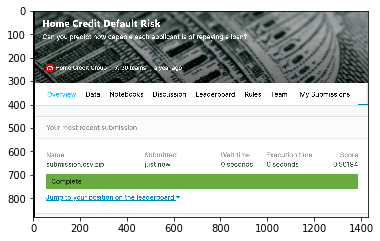

In [17]:
from PIL import Image
img = Image.open('./submission.png')
plt.imshow(img)

# 問題4 特徴量エンジニアリング

In [18]:
application_mix = df.copy()
del application_mix['TARGET']
X = application_mix
y = df["TARGET"]

In [19]:
mask = np.array(X.dtypes != 'O' )
# print(mask)
idx = np.arange(len(X.columns))
# print(idx[mask])
X = X.iloc[:,mask]
X.head()


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [23]:
#1.欠損値を平均値で補間した場合のスコア
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

smp = SimpleImputer()
X_train_smp = smp.fit_transform(X_train)
X_test_smp = smp.fit_transform(X_test)
clf = lgb.LGBMClassifier().fit(X_train_smp, y_train)
y_pred = clf.predict(X_test_smp)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.8220036941647806
適合率:0.5478260869565217
再現率:0.010343129207026762
F値 :0.020302932645826624
[[70735    52]
 [ 6028    63]]


In [24]:
#2.欠損値を中央値で補間した場合のスコア
smp = SimpleImputer(strategy='median')
X_train_smp = smp.fit_transform(X_train)
X_test_smp = smp.fit_transform(X_test)
clf = lgb.LGBMClassifier().fit(X_train_smp, y_train)
y_pred = clf.predict(X_test_smp)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.8688181274226697
適合率:0.5666666666666667
再現率:0.016746018716138567
F値 :0.03253069685855526
[[70709    78]
 [ 5989   102]]


In [25]:
#3.欠損値を最頻値で補間した場合のスコア
smp = SimpleImputer(strategy='most_frequent')
X_train_smp = smp.fit_transform(X_train)
X_test_smp = smp.fit_transform(X_test)
clf = lgb.LGBMClassifier().fit(X_train_smp, y_train)
y_pred = clf.predict(X_test_smp)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.8825281615026406
適合率:0.50920245398773
再現率:0.013626662288622558
F値 :0.02654301247201791
[[70707    80]
 [ 6008    83]]


In [26]:
#4. 欠損値を定数で補間した場合のスコア
smp = SimpleImputer(strategy='constant')
X_train_smp = smp.fit_transform(X_train)
X_test_smp = smp.fit_transform(X_test)
clf = lgb.LGBMClassifier().fit(X_train_smp, y_train)
y_pred = clf.predict(X_test_smp)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.9208616249121986
適合率:0.519774011299435
再現率:0.015104252175340666
F値 :0.029355456285896617
[[70702    85]
 [ 5999    92]]


In [32]:
df_not_O = df.iloc[:,mask]
df_not_O.head()

,SK_ID_CURR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,Y,0,202500.0,406597.5,24700.5,House / apartment,0.018801,-9461,-637,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,100003,N,0,270000.0,1293502.5,35698.5,House / apartment,0.003541,-16765,-1188,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,100004,Y,0,67500.0,135000.0,6750.0,House / apartment,0.010032,-19046,-225,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,100006,Y,0,135000.0,312682.5,29686.5,House / apartment,0.008019,-19005,-3039,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,100007,Y,0,121500.0,513000.0,21865.5,House / apartment,0.028663,-19932,-3038,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [35]:
imp = SimpleImputer()
X_imputed = imp.fit_transform(X)
X_df = pd.DataFrame(data=X_imputed, columns = df_not_O.columns)
X_corr = X_df.corr()

In [36]:
X_corr.head()

,SK_ID_CURR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,1.000000,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,...,0.000509,0.000167,0.001073,0.000282,-0.002486,-0.002040,0.001953,0.000452,0.000954,0.004335
FLAG_OWN_REALTY,-0.001129,1.000000,0.012882,0.002145,0.021374,-0.001826,-0.025573,0.330938,-0.239818,0.183395,...,0.004031,0.000864,0.000988,-0.002450,-0.000383,-0.000342,-0.002277,-0.010101,-0.007324,-0.038834
CNT_CHILDREN,-0.001820,0.012882,1.000000,0.156870,0.191657,0.159600,0.074796,0.027261,-0.064223,0.027805,...,0.003130,0.002408,0.000242,-0.000589,0.000691,0.002868,0.002326,0.024063,0.004734,0.011388
AMT_INCOME_TOTAL,-0.000343,0.002145,0.156870,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,0.009621,...,0.034329,0.021082,0.031023,-0.016148,-0.003654,0.003964,-0.001192,0.050934,0.014896,-0.045318
AMT_CREDIT,-0.000433,0.021374,0.191657,0.770127,1.000000,0.774661,0.118424,0.009445,-0.104331,0.038513,...,-0.009745,0.004573,0.011718,-0.017598,0.003565,0.002018,0.012815,0.036148,0.009348,-0.010452


In [53]:
mask = np.array(df.dtypes != 'O' )
# print(mask)
idx = np.arange(len(df.columns))
# print(idx[mask])
df_mask = df.iloc[:,mask]
df_mask.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
corr_columns = df_mask.columns
df_corr = df_mask.corr()
df_target = make_corr('TARGET', corr_columns, df_corr)
df_target.head()

,corr,TARGET
TARGET,TARGET,1.000000
EXT_SOURCE_3,EXT_SOURCE_3,0.178919
EXT_SOURCE_2,EXT_SOURCE_2,0.160472
EXT_SOURCE_1,EXT_SOURCE_1,0.155317
DAYS_BIRTH,DAYS_BIRTH,0.078239


In [43]:
def make_corr(var_name, corr_columns, df_corr):
    df_corr['corr'] = corr_columns
    var_corr= df_corr.loc[:,['corr',var_name]]
    #ex3_corr.head()
    var_corr[var_name] = np.abs(var_corr.iloc[:,1])
    var_corr.head()
    df_var = var_corr.sort_values(var_name, ascending=False)
    df_var = pd.DataFrame(data=df_var)
    return df_var

In [63]:
from sklearn.impute import SimpleImputer
print(list(df_target.index[1:6]))
target_list = list(df_target.index[1:6])
X = np.array(df.loc[:,target_list])
imp = SimpleImputer()
X_imp = imp.fit_transform(X)


['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']


In [64]:
#5. 3乗までの交互作用項を追加する
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
print('poly')
print('poly_fitted')
print('transform')
X_poly = poly.fit_transform(X_imp)
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X_poly, y, test_size=0.25, random_state=0,
)
clf = lgb.LGBMClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred =clf.predict(X_test)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

poly
poly_fitted
transform
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.9204713962381956
適合率:0.4
再現率:0.007552126087670333
F値 :0.014824363519174991
[[70718    69]
 [ 6045    46]]


### まとめ

1. 欠損値を平均値で補間した場合のスコア<br>
正解率:0.8220036941647806<br>
適合率:0.5478260869565217<br>
再現率:0.010343129207026762<br>
F値 :0.020302932645826624<br>
2. 欠損値を中央値で補間した場合のスコア<br>
正解率:0.8688181274226697<br>
適合率:0.5666666666666667<br>
再現率:0.016746018716138567<br>
F値 :0.03253069685855526<br>
3. 欠損値を最頻値で補間した場合のスコア<br>
正解率:0.8825281615026406<br>
適合率:0.50920245398773<br>
再現率:0.013626662288622558<br>
F値 :0.02654301247201791<br>
4. 欠損値を定数で補間した場合のスコア<br>
正解率:0.9208616249121986<br>
適合率:0.519774011299435<br>
再現率:0.015104252175340666<br>
F値 :0.029355456285896617<br>
5. 3乗までの交互作用項を追加する<br>
正解率:0.9204713962381956<br>
適合率:0.4<br>
再現率:0.007552126087670333<br>
F値 :0.014824363519174991<br>

適合率や再現率にそれぞれ強い分野が異なる。そのため、F値が最も高い欠損値を中央値で補間したモデルを使用する。

### kaggle提出

In [65]:
sub_df = pd.read_csv('./sample_submission.csv')
sub_df.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [66]:
test_df = pd.read_csv('./application_test.csv')
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
X_df = df.copy()
del X_df['TARGET']
mask = np.array(X_df.dtypes != 'O' )
X = X_df.iloc[:,mask]
print(len(mask))
X.head()

121


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y = np.array(df.loc[:,'TARGET'])

In [73]:
X_test = np.array(test_df.loc[:, mask])

In [76]:
#2.欠損値を中央値で補間した場合のスコア
smp_med = SimpleImputer(strategy='median')
X_train_smp = smp_med.fit_transform(X)
X_test_smp = smp_med.fit_transform(X_test)
clf = lgb.LGBMClassifier().fit(X_train_smp, y)
y_pred = clf.predict(X_test_smp)

In [78]:
sub_df['TARGET'] = y_pred
sub_df['SK_ID_CURR'] = test_df.loc[:, 'SK_ID_CURR']

In [79]:
sub_df.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [81]:
sub_df.to_csv('./mysubmission.csv', index=False)

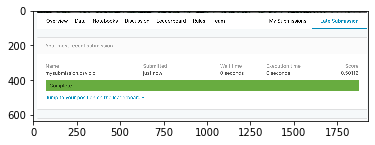

In [83]:
import matplotlib.pyplot as plt
from PIL import Image
img =  Image.open('./submission2.png')
plt.imshow(img)

# 下記おまけ

In [ ]:
from scipy.stats import pearsonr
list_i = []
for i in application_mix.columns: 
    a, b = pearsonr(application_mix[i],df["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        print("{},{}".format(i,a))

In [ ]:
clf = lgb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
ohe_corr = ohe_df.corr()

In [ ]:
print(len(ohe_corr.columns))#247
print(len(ohe_corr['TARGET']))#246

In [ ]:
ohe_corr['corr'] = ohe_corr.columns#相関名
targetvar = ohe_corr.loc[:,['corr','TARGET']]
targetvar.shape
targetvar.head()

In [ ]:
type(targetvar)

In [ ]:
targetvar['TARGET'] = np.abs(targetvar.iloc[:,1])
targetvar.head()

In [ ]:
targetvar_sorted = targetvar.sort_values('TARGET',ascending=False)
targetvar_sorted

In [ ]:
fig = plt.figure(1,figsize=(40,20))
sns.barplot(data=targetvar_sorted.iloc[1:,:],x="corr",y="TARGET")
plt.xticks(rotation=90)

In [ ]:
#平均値補完

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
mean_imr = imr.fit(ohe_df.values)
mean_data = imr.transform(ohe_df.values)
mean_data

In [106]:
mean_data_df = pd.DataFrame(data=mean_data,columns=ohe_df.columns)
mean_data_df.head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


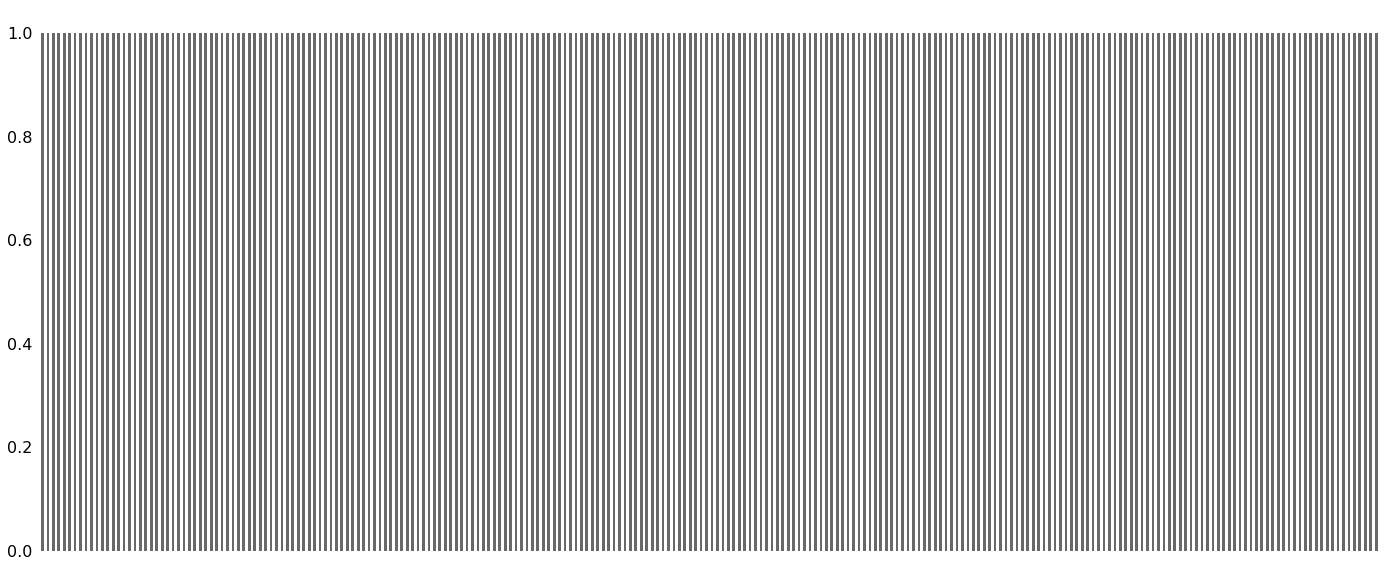

In [108]:
msno.bar(mean_data_df)

In [66]:
ohe_corr['corr'] = ohe_corr.columns
ohe_corr[]
#ohe_corr['TARGET'].sort_vlaues(ascending=False)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,corr
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.002073,-0.000976,0.000072,-0.001396,0.002300,-1.280782e-03,-0.000270,0.000510,0.002549,SK_ID_CURR
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.006777,-0.001713,-0.009384,0.000628,-0.033119,-1.265666e-02,0.007946,-0.042201,0.004829,TARGET
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-2.508821e-02,0.011036,-0.038644,0.004525,CNT_CHILDREN
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.011696,0.006149,0.023886,0.003886,0.032753,1.652333e-02,-0.003369,0.050174,-0.002894,AMT_INCOME_TOTAL
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.014314,0.007987,0.027255,0.005799,0.046644,9.756049e-03,-0.007373,0.058256,-0.004308,AMT_CREDIT
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,0.015589,0.010077,0.035318,0.005968,0.054988,9.188742e-03,-0.007711,0.068145,-0.003910,AMT_ANNUITY
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.013696,0.009955,0.028315,0.005877,0.049759,1.288831e-02,-0.009135,0.062878,-0.004848,AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.078062,0.016288,0.045775,0.013435,0.092652,1.078225e-02,-0.056263,0.103513,-0.029932,REGION_POPULATION_RELATIVE
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-1.096440e-02,0.008758,-0.019852,0.005434,DAYS_BIRTH
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-6.326739e-03,-0.002846,-0.010907,-0.003571,DAYS_EMPLOYED


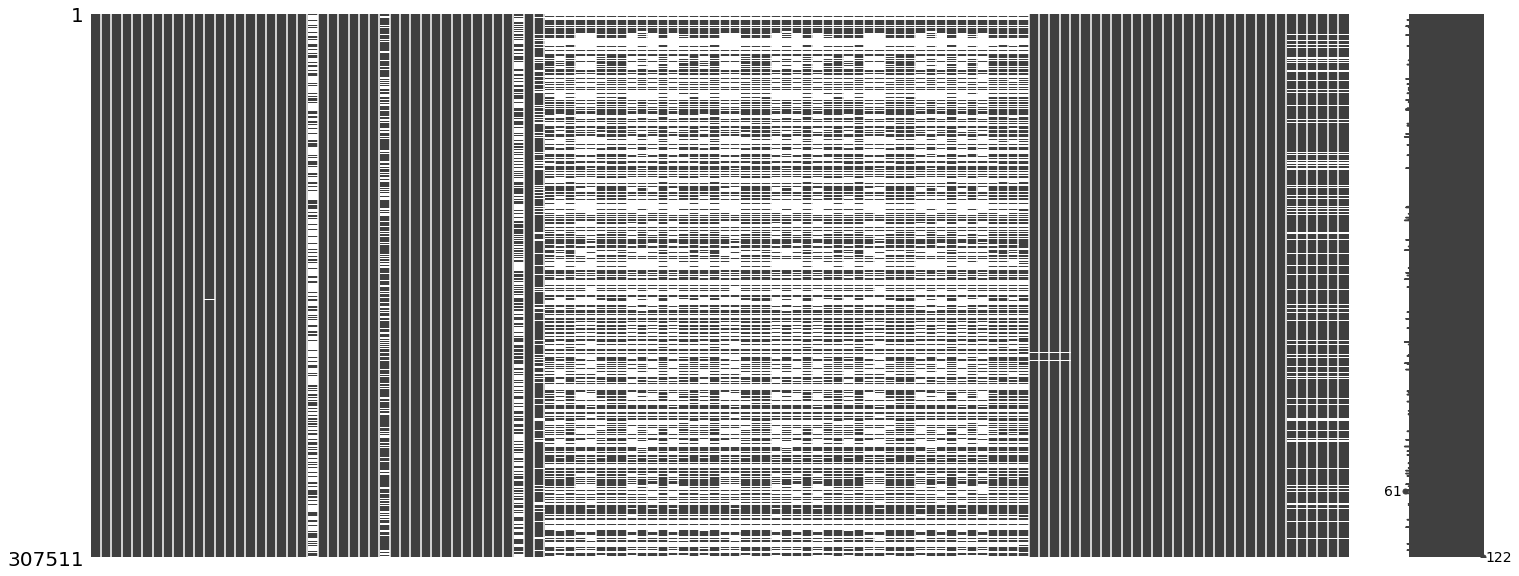

In [11]:
import missingno as msno
msno.matrix(df)

In [13]:
df_corr = df.corr()

In [26]:
print(df_corr.head())
df_columns = df_corr.columns
df_columns

                  SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          1.000000 -0.002108     -0.001129         -0.001820   
TARGET             -0.002108  1.000000      0.019187         -0.003982   
CNT_CHILDREN       -0.001129  0.019187      1.000000          0.012882   
AMT_INCOME_TOTAL   -0.001820 -0.003982      0.012882          1.000000   
AMT_CREDIT         -0.000343 -0.030369      0.002145          0.156870   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR         -0.000343    -0.000433        -0.000232   
TARGET             -0.030369    -0.012817        -0.039645   
CNT_CHILDREN        0.002145     0.021374        -0.001827   
AMT_INCOME_TOTAL    0.156870     0.191657         0.159610   
AMT_CREDIT          1.000000     0.770138         0.986968   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  ...  \
SK_ID_CURR                          0.000849   -0.001500       0.001366  ...   
TARGET                

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'corr'],
      dtype='object', length=107)

In [27]:
corr_target = df_corr.iloc[:,1]
corr_target.head()
corr_target['col'] = df_columns
corr_target
corr_target.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(107,)

In [35]:
df_corr = df.corr()
df_corr
corr_columns = df_corr.columns
corr_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [36]:
df_corr['corr'] = corr_columns
target_corr= df_corr.loc[:,['corr','TARGET']]
target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,-0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,AMT_CREDIT,-0.030369


In [37]:
target_corr['TARGET'] = np.abs(target_corr.iloc[:,1])
target_corr.head()


,corr,TARGET
SK_ID_CURR,SK_ID_CURR,0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.003982
AMT_CREDIT,AMT_CREDIT,0.030369


In [97]:
type(target_corr)

pandas.core.frame.DataFrame

In [38]:
df_c = target_corr.sort_values('TARGET', ascending=False)
df_c = pd.DataFrame(data=df_c)
type(df_c)

pandas.core.frame.DataFrame

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]), <a list of 105 Text xticklabel objects>)

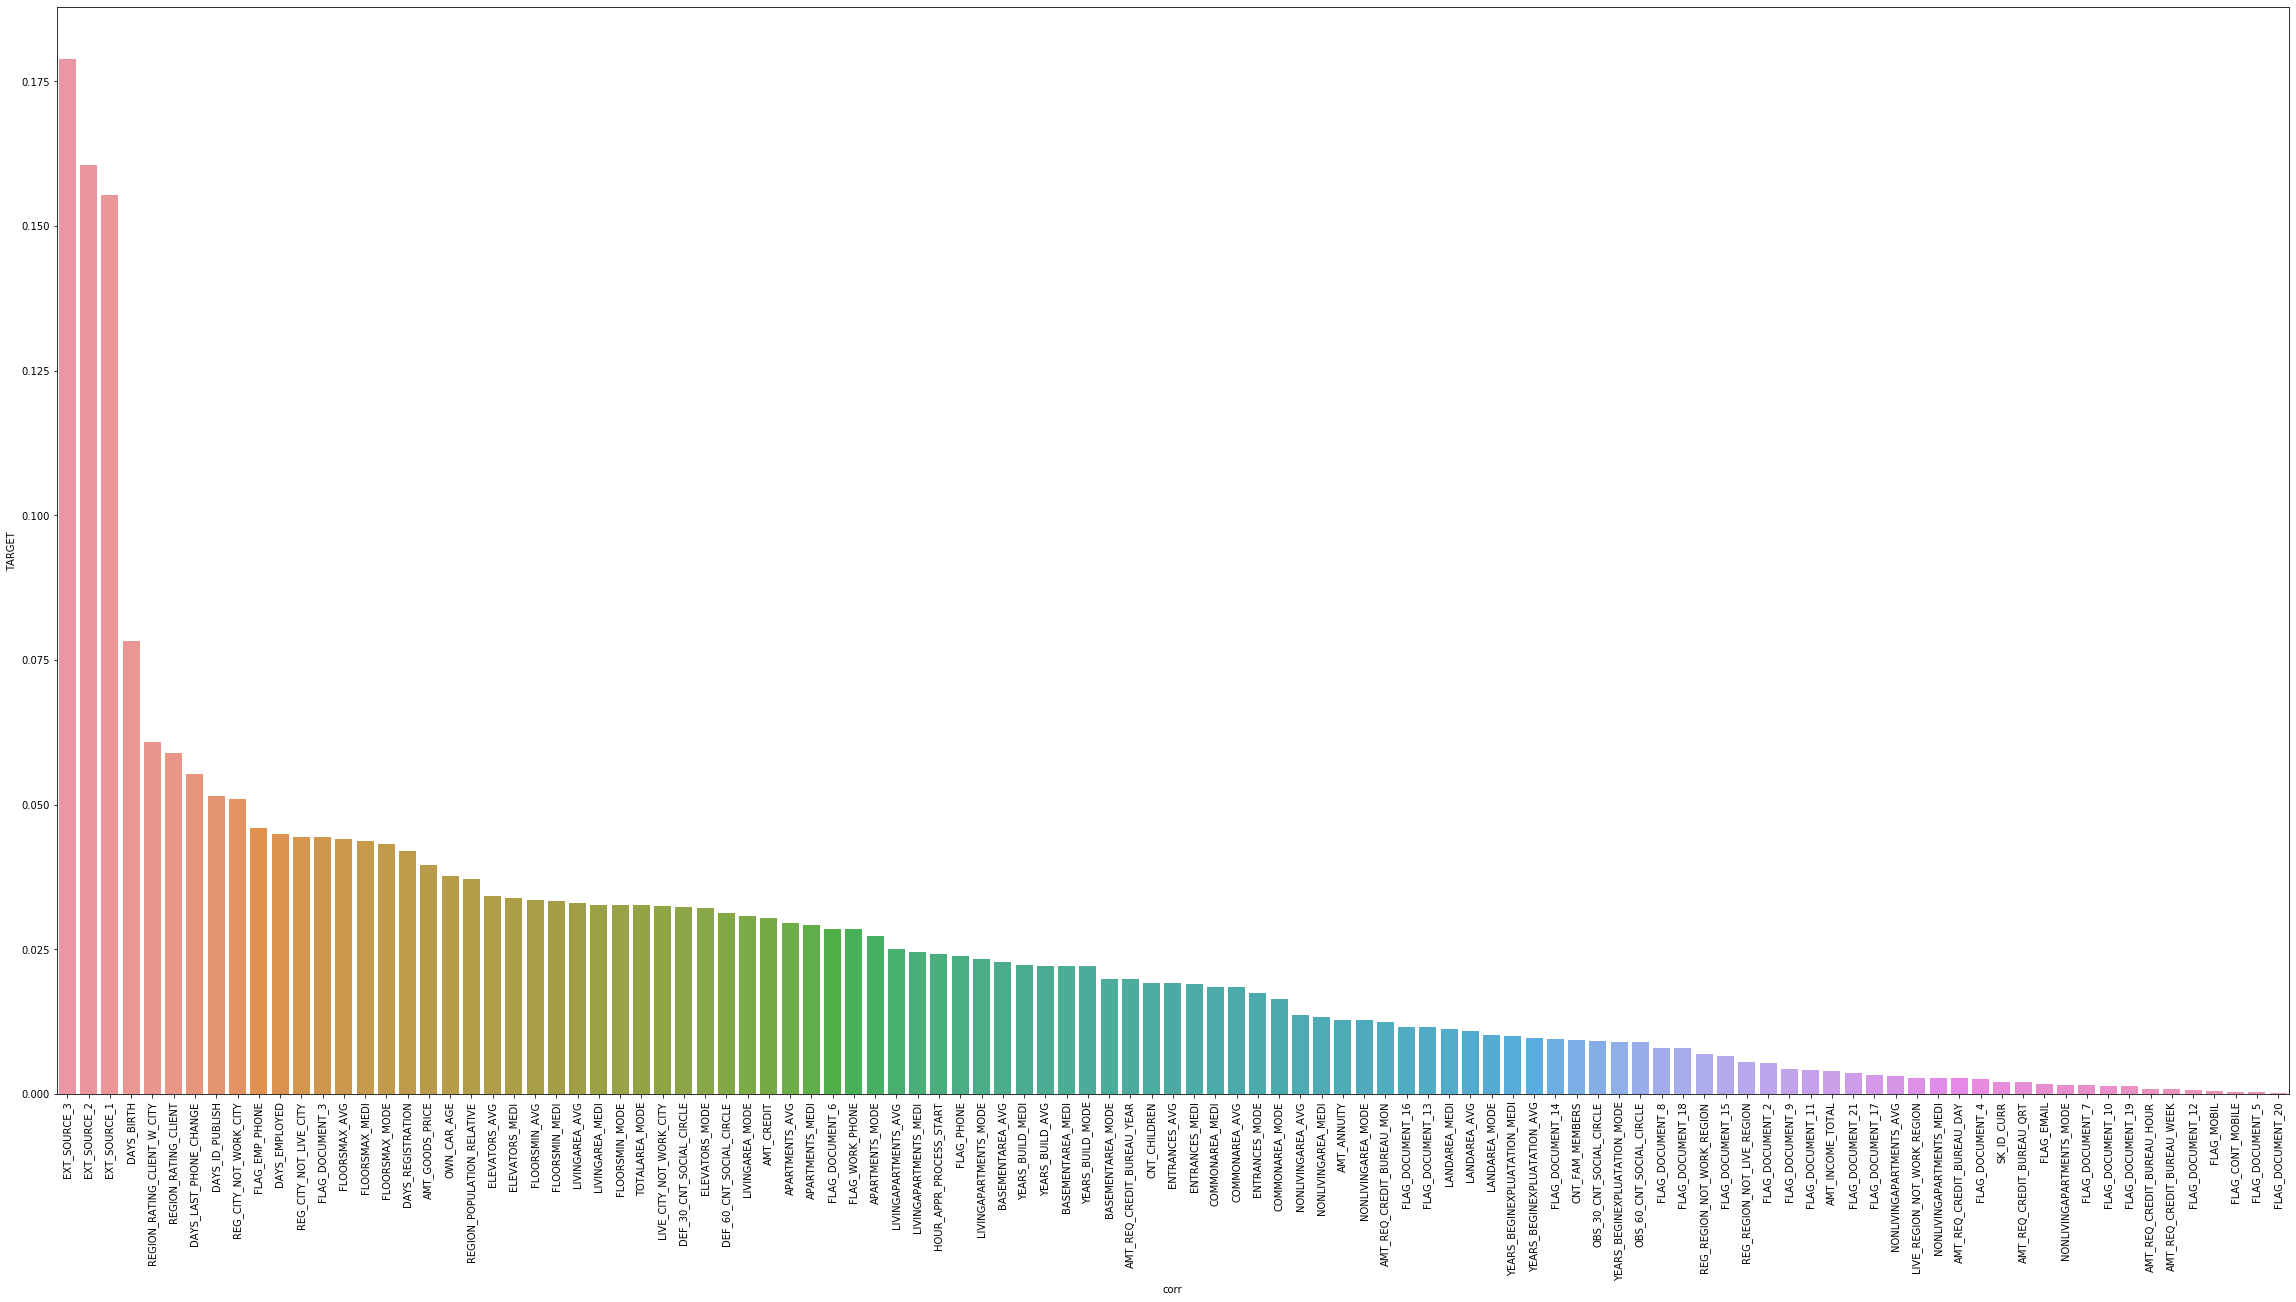

In [39]:
fig = plt.figure(1,figsize=(40,20))
sns.barplot(data=df_c.iloc[1:,:],x="corr",y="TARGET")
plt.xticks(rotation=90)

corr      FLOORSMIN_AVG
TARGET        0.0336135
Name: FLOORSMIN_AVG, dtype: object


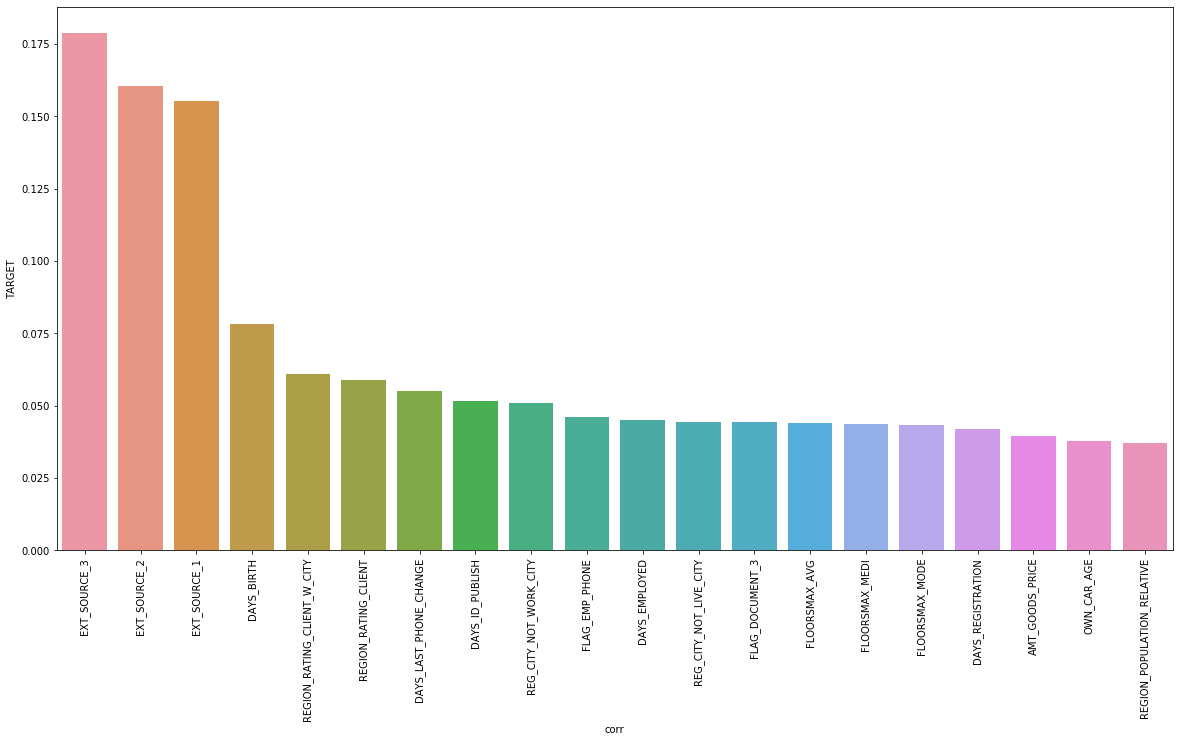

In [54]:
fig = plt.figure(1,figsize=(20,10))
top20_data = df_c.iloc[1:21,:]
sns.barplot(data=top20_data,x="corr",y="TARGET")
plt.xticks(rotation=90)
top20_data.shape
print(df_c.iloc[23,])

# 欠損の割合調査

In [121]:
#欠損の割合調査
ext1_percent = ohe_df.loc[:,'EXT_SOURCE_1'].isnull().sum()/ohe_df.shape[0]*100
ext2_percent = ohe_df.loc[:,'EXT_SOURCE_2'].isnull().sum()/ohe_df.shape[0]*100
ext3_percent = ohe_df.loc[:,'EXT_SOURCE_3'].isnull().sum()/ohe_df.shape[0]*100

print('EXT_SOURCE_1の欠損値の割合:{:.2f}%'.format(ext1_percent))
print('EXT_SOURCE_2の欠損値の割合:{:.2f}%'.format(ext2_percent))
print('EXT_SOURCE_3の欠損値の割合:{:.2f}%'.format(ext3_percent))

EXT_SOURCE_1の欠損値の割合:56.38%
EXT_SOURCE_2の欠損値の割合:0.21%
EXT_SOURCE_3の欠損値の割合:19.83%


# EXT_SOURCE_1と相関の高い変数を探索する

In [132]:
def make_corr(var_name):
    df_corr['corr'] = corr_columns
    var_corr= df_corr.loc[:,['corr',var_name]]
    #ex3_corr.head()
    var_corr[var_name] = np.abs(var_corr.iloc[:,1])
    var_corr.head()
    df_var = var_corr.sort_values(var_name, ascending=False)
    df_var = pd.DataFrame(data=df_var)
    return df_var
    

In [133]:
def make_gragh(df_var,var_name):
    
    fig = plt.figure(1,figsize=(20,10))
    top20_var = df_var.iloc[1:21,:]
    sns.barplot(data=top20_var,x="corr",y=var_name)
    plt.xticks(rotation=90)

In [134]:
ex1_corr_df = make_corr('EXT_SOURCE_1')
ex1_corr_df.head()

,corr,EXT_SOURCE_1
EXT_SOURCE_1,EXT_SOURCE_1,1.000000
DAYS_BIRTH,DAYS_BIRTH,0.600610
FLAG_EMP_PHONE,FLAG_EMP_PHONE,0.294147
DAYS_EMPLOYED,DAYS_EMPLOYED,0.289848
EXT_SOURCE_2,EXT_SOURCE_2,0.213982


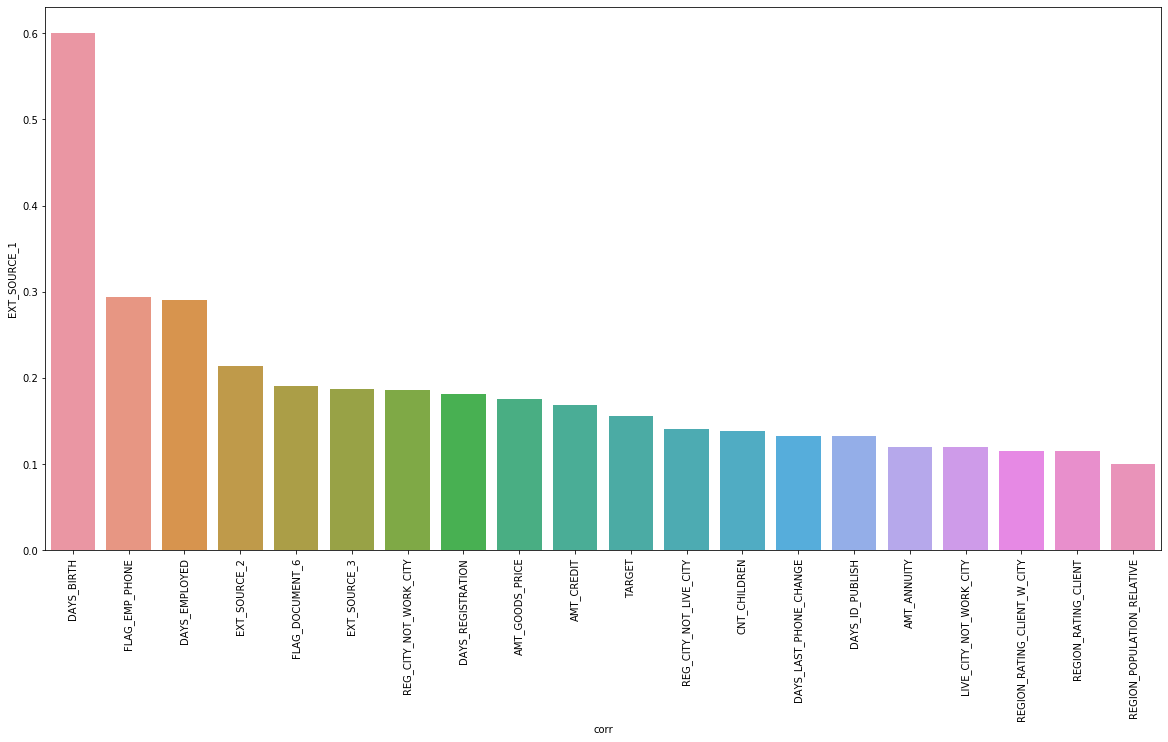

In [135]:
make_gragh(ex1_corr_df, 'EXT_SOURCE_1')

In [136]:
ex2_corr_df = make_corr('EXT_SOURCE_2')
ex2_corr_df.head()

,corr,EXT_SOURCE_2
EXT_SOURCE_2,EXT_SOURCE_2,1.000000
REGION_RATING_CLIENT,REGION_RATING_CLIENT,0.292895
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,0.288299
EXT_SOURCE_1,EXT_SOURCE_1,0.213982
REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE,0.198924


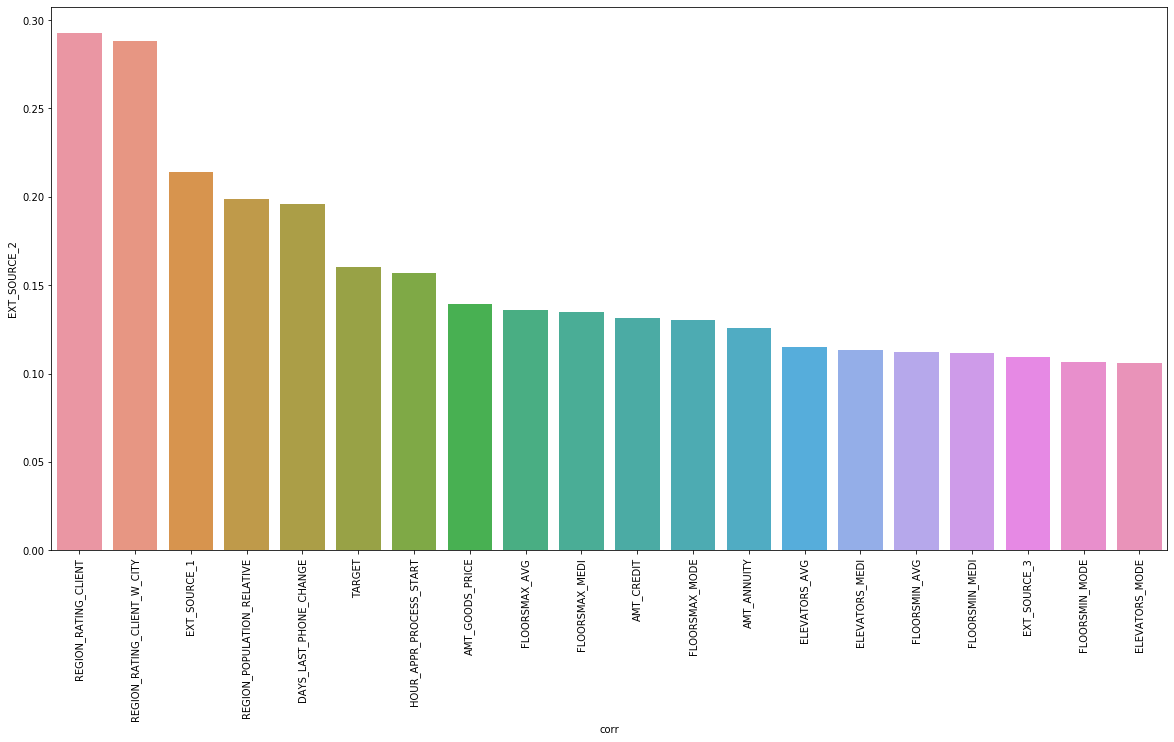

In [137]:
make_gragh(ex2_corr_df, 'EXT_SOURCE_2')


In [138]:
df_corr['corr'] = corr_columns
ex3_corr= df_corr.loc[:,['corr','EXT_SOURCE_3']]
ex3_corr.head()
ex3_corr['EXT_SOURCE_3'] = np.abs(ex3_corr.iloc[:,1])
ex3_corr.head()
df_ex3 = ex3_corr.sort_values('EXT_SOURCE_3', ascending=False)
df_ex3 = pd.DataFrame(data=df_ex3)
#type(df_ex3)

corr            DEF_30_CNT_SOCIAL_CIRCLE
EXT_SOURCE_3                   0.0362526
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: object


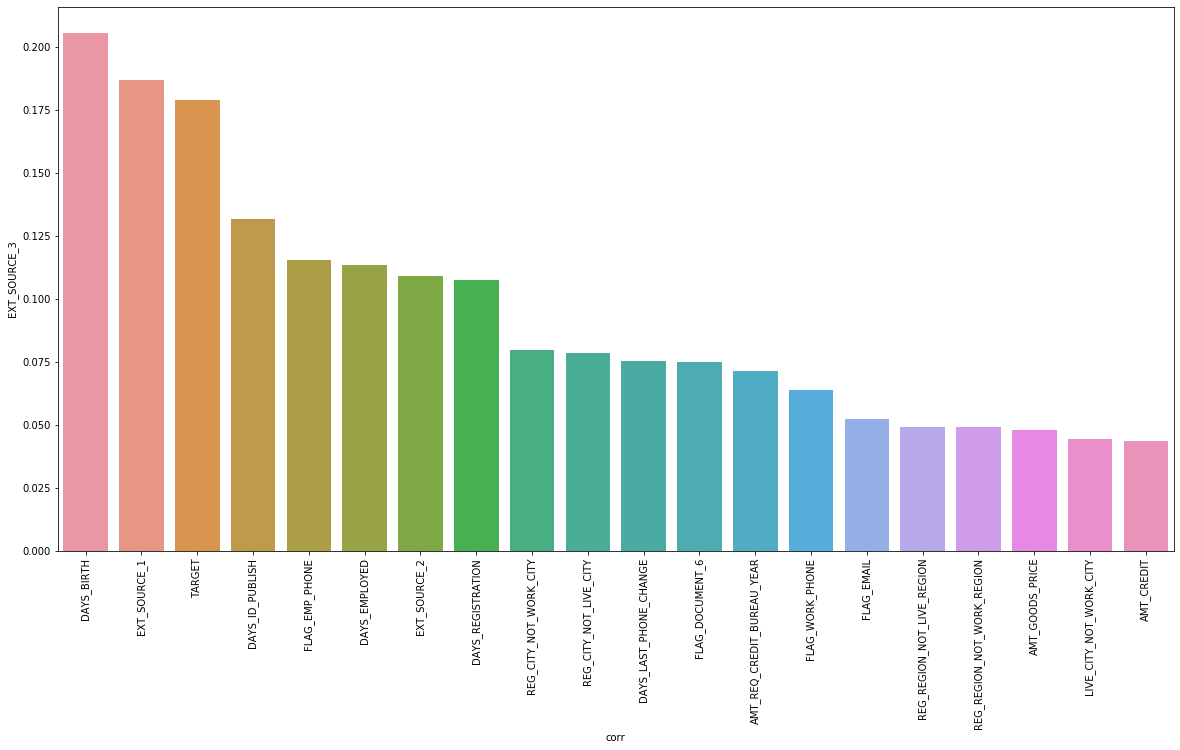

In [139]:
fig = plt.figure(1,figsize=(20,10))
top20_ex3 = df_ex3.iloc[1:21,:]
sns.barplot(data=top20_ex3,x="corr",y="EXT_SOURCE_3")
plt.xticks(rotation=90)
top20_ex3.shape
print(df_ex3.iloc[23,])

# ここまでのまとめ

EXT_SOURCE_1の欠損値が56%を占めていて、この欠損値補完を考える。
この欠損値を補完すると方法として、相関性の高い変数を活用することを考える。
そのため、まず相関の高い変数を上記で分析した結果DayBirthの相関が0.6であり、
とても高い相関であった。
従って、この変数を欠損値補完に活用する


# DayBirth、EXT_SOURCE_1のデータによる特徴量エンジニアリング

In [143]:
ohe_df.loc[:,'DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [146]:
from sklearn.preprocessing import StandardScaler

In [160]:
sc = StandardScaler()
array_daybirth = np.array(ohe_df.loc[:,'DAYS_BIRTH'])
array_daybirth = array_daybirth.reshape(-1,1)
array_daybirth.shape



(307511, 1)

In [161]:
sc_daybirth = sc.fit(array_daybirth)

In [165]:
daybirth_stadard = sc_daybirth.transform(array_daybirth)
daybirth_stadard

array([[ 1.50687967],
       [-0.16682127],
       [-0.68950909],
       ...,
       [ 0.24541696],
       [ 0.93400832],
       [-0.18767379]])

In [166]:
array_ext1 = np.array(ohe_df.loc[:,'EXT_SOURCE_1'])
array_ext1 = array_ext1.reshape(-1,1)
array_ext1.shape

(307511, 1)

In [167]:
sc_ext1 = sc.fit(array_ext1)
ext1_standard = sc_ext1.transform(array_ext1)
ext1_standard

array([[-1.98564358],
       [-0.90429817],
       [        nan],
       ...,
       [ 1.14609551],
       [        nan],
       [ 1.10076875]])

In [177]:
ext1_standard[2]


array([nan])

In [184]:
count = 0
for ext1, day in zip(ext1_standard,daybirth_stadard ):
    if ext1 == np.nan:
        print(count)
        #ext1_standard[count] = day
    count+=1
#print(ext1_standard)

In [185]:
print(np.nan)


nan


In [186]:
type(np.nan)

float